In [89]:
#This code may have snippets taken from the Internet
import nltk
from nltk import bigrams

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

import collections
from collections import Counter
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

corpusdir = 'corpus/'  # point to the Directory of corpus.
your_corpus = PlaintextCorpusReader(corpusdir, '.*')

In [90]:
your_corpus.sents()

[['An', 'airplane', 'accelerates', 'down', 'a', 'runway', 'at', '3', '.', '20', 'm', '/', 's2', 'for', '32', '.', '8', 's', 'until', 'is', 'finally', 'lifts', 'off', 'the', 'ground', '.'], ['Determine', 'the', 'distance', 'traveled', 'before', 'takeoff', '.'], ...]

In [91]:
#compute the bigram model
def build_bigram_model():
    bigram_model = collections.defaultdict(lambda: collections.defaultdict(lambda: 0))
    for sentence in your_corpus.sents():
        sentence = [word.lower() for word in sentence if word.isalpha()]  # get alpha only
        
        #Collect all bigrams counts for (w1,w2)
        for w1, w2 in bigrams(sentence):
            bigram_model[w1][w2] += 1
            
        #compute the probability for the bigram starting with w1
        for w1 in bigram_model:
            #total count of bigrams starting with w1
            bigram_count_4_w1 = float(sum(bigram_model[w1].values()))
            #distribute the probability mass for all bigrams starting with w1
            for w2 in bigram_model[w1]:
                bigram_model[w1][w2] /= bigram_count_4_w1
    return bigram_model

In [92]:
model=build_bigram_model()
second_word=model['how']
print(list(second_word.keys())[0])

far


In [93]:
top10words=Counter(second_word).most_common(10)
print(top10words)

[('far', 0.5628668144533753), ('long', 0.26565957263477835), ('fast', 0.16799166845157743), ('tall', 0.001955091953277588), ('high', 0.0009765637999710939), ('much', 0.0005502887070202716), ('does', 5.139921410301658e-19), ('many', 5.019455100613327e-22)]


In [94]:
list(zip(*top10words))

[('far', 'long', 'fast', 'tall', 'high', 'much', 'does', 'many'),
 (0.5628668144533753,
  0.26565957263477835,
  0.16799166845157743,
  0.001955091953277588,
  0.0009765637999710939,
  0.0005502887070202716,
  5.139921410301658e-19,
  5.019455100613327e-22)]

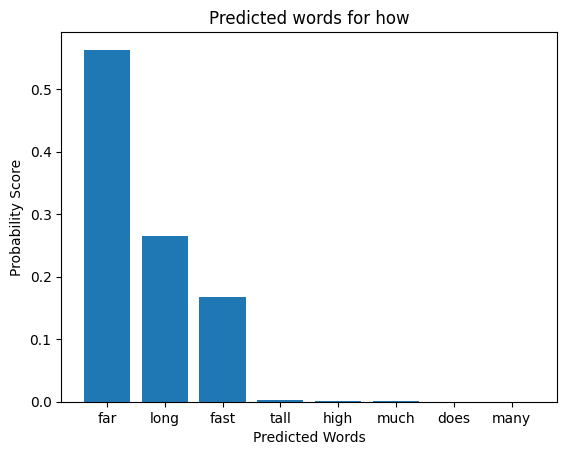

In [95]:
def predict_next_word(first_word):
    #buikd the model
    model = build_bigram_model()
    #get the next for the bigram starting with 'word'
    second_word = model[first_word]
    #get the top 10 words whose first word is 'first_word'
    top10words = Counter(second_word).most_common(10)


    predicted_words = list(zip(*top10words))[0]
    probability_score = list(zip(*top10words))[1]
    x_pos = np.arange(len(predicted_words))

    # calculate slope and intercept for the linear trend line
    slope, intercept = np.polyfit(x_pos, probability_score, 1)

    plt.bar(x_pos, probability_score,align='center')
    plt.xticks(x_pos, predicted_words)
    plt.ylabel('Probability Score')
    plt.xlabel('Predicted Words')
    plt.title('Predicted words for ' + first_word)
    plt.show()

predict_next_word('how')

# Predicting Next Few words

In [103]:
model = build_bigram_model()

In [104]:
second_word=model['how']
print(sorted(second_word.items(), key = lambda kv:(kv[1], kv[0]))[-1][0])

far


In [105]:
start='how'
final='how'
for i in range(15):
    second_word=model[start]
    second_word=sorted(second_word.items(), key = lambda kv:(kv[1], kv[0]))[-1][0]
    final=final+" "+second_word
    start=second_word
print(final)    

how far did the ball has rolled at the ball has rolled at the ball has
